In [1]:
#loading the data set
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train:  (50000, 32, 32, 3)


In [2]:
#accuracy calculation
def accuracy(y_pred,y):
        batch_size=y_pred.shape[0] # number of input data
        acc=(1/batch_size)*(np.abs(np.argmax(y,axis=1)==np.argmax(y_pred,axis=1))).sum()
        return acc

In [4]:
H=200
std=1e-6
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H,K)
b1 = np.zeros(H)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = Ntr

#gradient descent
iterations = 300
lr = 1.4e-2
lr_decay=0.999
reg = 5e-6
train_loss_history = []
test_loss_history = [] #for testing set
train_acc_history = []
val_acc_history = [] #for testing set
lr_history=[lr]
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]

    # Forward pass
    h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
    y_pred=h.dot(w2)+b2
    train_loss= (1./(batch_size))*np.square(y_pred-y).sum() + reg*(np.sum(w1*w1)+np.sum(w2*w2))
    train_loss_history.append(train_loss)

    #loss and accuracy alculation for test set 
    #does not affect learning of the model
    h_test=1.0/(1.0+np.exp(-(x_test.dot(w1)+b1)))
    y_pred_test=h_test.dot(w2)+b2
    test_loss= (1./Nte)*np.square(y_pred_test-y_test).sum() + reg*(np.sum(w1*w1)+np.sum(w2*w2))
    test_loss_history.append(test_loss)

    #calculating accuracies
    train_acc=accuracy(y_pred,y)
    train_acc_history.append(train_acc)
    test_acc=accuracy(y_pred_test,y_test)
    val_acc_history.append(test_acc)

    if t%10==0:
        print('%d / %d: train_loss: %f test_loss:%f train_acc:%f test_acc:%f' % (t, iterations, train_loss,test_loss,train_acc,test_acc))

    # Backward pass
    dy_pred=(1./batch_size)*2.0*(y_pred-y)
    dw2=h.T.dot(dy_pred) + reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x.T.dot(dh*h*(1-h)) + reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)
    w1 -= lr*dw1
    b1 -= lr*db1
    w2 -= lr*dw2
    b2 -= lr*db2
    lr *= lr_decay
    lr_history.append(lr)

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
0 / 300: train_loss: 1.000001 test_loss:1.000001 train_acc:0.100000 test_acc:0.100000
10 / 300: train_loss: 0.900213 test_loss:0.900848 train_acc:0.156040 test_acc:0.154900
20 / 300: train_loss: 0.849865 test_loss:0.849235 train_acc:0.269800 test_acc:0.270400
30 / 300: train_loss: 0.839847 test_loss:0.839352 train_acc:0.284720 test_acc:0.280500
40 / 300: train_loss: 0.828744 test_loss:0.828533 train_acc:0.319020 test_acc:0.319200
50 / 300: train_loss: 0.826344 test_loss:0.826743 train_acc:0.309800 test_acc:0.315500
60 / 300: train_loss: 0.818134 test_loss:0.819378 train_acc:0.333580 test_acc:0.333400
70 / 300: train_loss: 0.807375 test_loss:0.808773 train_acc:0.357520 test_acc:0.357400
80 / 300: train_loss: 0.793534 test_loss:0.795666 train_acc:0.383340 test_acc:0.380000
90 / 300: train_loss: 0.791841 test_loss:0.794579 train_acc:0.384160 test_acc:0.378600
100 / 300: train_loss: 0.806254 test_loss:0.808469 train_acc:0.364600 test_acc:0

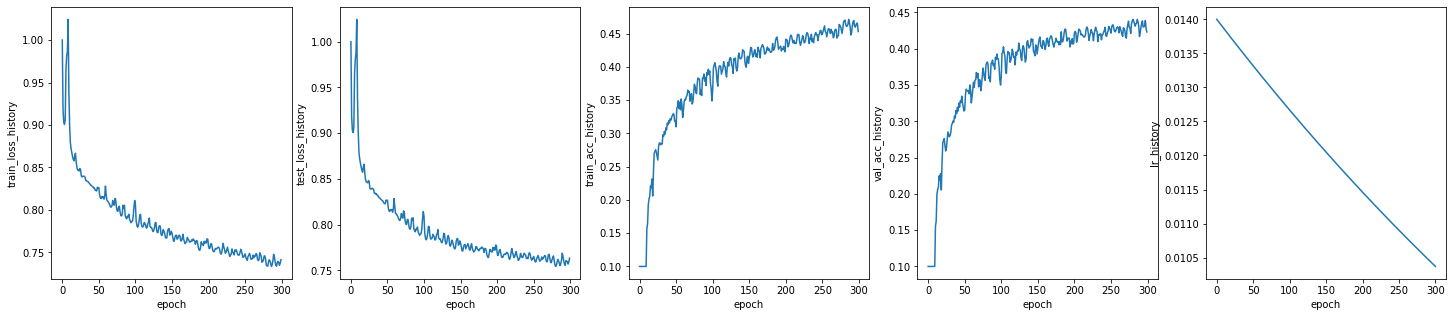

In [5]:
history_lists=[train_loss_history,test_loss_history,train_acc_history,val_acc_history,lr_history]
titles=['train_loss_history','test_loss_history','train_acc_history','val_acc_history','lr_history']
fig,ax=plt.subplots(1,5,figsize=(25,5))
for i in range(len(history_lists)):
        ax[i].plot(history_lists[i])
        ax[i].set_ylabel(titles[i])
        ax[i].set_xlabel("epoch")
        ax[i].plot()


In [6]:
# Printing accuracies
x_t=x_train
y_pred=x_t.dot(w1)+b1
batch_size=Ntr
train_acc= 1/batch_size*((np.argmax(y_train,axis=1) == np.argmax(y_pred,axis=1))).sum()
print("train_acc = ",train_acc)

x_t=x_test
y_pred=x_t.dot(w1)+b1
batch_size=Nte
test_acc= 1/batch_size*((np.argmax(y_test,axis=1) == np.argmax(y_pred,axis=1))).sum()
print("test_acc = ",test_acc)

train_acc =  0.005180000000000001
test_acc =  0.0063
